1. libreria y cargue de datos.

2. extraccion de caracteristicas y preprocesamiento de datos.

3. Preparacion de datos para el modelo (seleccion de caracteristicas, dividir los datos entrenamiento)

4. Entrenar el modelo(3 modelos)

5. Validacion del modelo.

6. Salvar el modelo seleccionado.

OJO LA MATRIX DE CONFUSION(falso positivos y falsos negativos)

In [1]:
  #1 #TRATAMIENTO DE DATOS
import pandas as pd
import numpy as np

#SISTEMA OPERATIVO
import os

#GRAFICO
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#LEER ARCHIVOS DE WEB
import urllib

#MAPA DE CALOR

import plotly.express as px

from sklearn import preprocessing
import joblib as jb

#!pip install --upgrade scikit-learn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Delitos proyecto/Delito Bucaramanga_preprocesar.csv')


In [4]:
df

,Unnamed: 0,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,BARRIOS_HECHO,FECHA_HECHO,HORA_HECHO,EDAD,GENERO,MOVIL_VICTIMA,MOVIL_AGRESOR,...,NOM_COM,CANTIDAD_UNICA,DIA_NOMBRE,DIA_NOMBRE_ORDEN,Comuna,FECHA_COMPLETA,lat,lon,RangoEdad,rangoHORARIO
0,0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,2019-06-17,08:30:00 p. m.,21,MASCULINO,A PIE,A PIE,...,SUR,1,lunes,1,"Comuna Sur, Bucaramanga, Colombia",17/06/2019 08:30:00 p. m.,7.083413,-73.132530,JUVENTUD,NOCHE
1,1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,11:15:00 p. m.,21,MASCULINO,A PIE,A PIE,...,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia",30/01/2019 11:15:00 p. m.,7.083413,-73.132530,JUVENTUD,NOCHE
2,2,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,06:00:00 p. m.,21,MASCULINO,A PIE,A PIE,...,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia",30/01/2019 06:00:00 p. m.,7.083413,-73.132530,JUVENTUD,TARDE
3,3,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,DELICIAS,2019-08-25,03:45:00 p. m.,24,MASCULINO,A PIE,A PIE,...,SUR,1,domingo,7,"Comuna Sur, Bucaramanga, Colombia",25/08/2019 03:45:00 p. m.,7.083413,-73.132530,JUVENTUD,TARDE
4,4,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,EL ROCÍO,2019-03-27,11:00:00 p. m.,23,MASCULINO,A PIE,A PIE,...,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia",27/03/2019 11:00:00 p. m.,7.083413,-73.132530,JUVENTUD,NOCHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97564,97564,ARTÍCULO 111. LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAPILLA PARTE ALTA,2023-03-17,07:22:00 p. m.,53,MASCULINO,A PIE,A PIE,...,CENTRO,1,viernes,5,"Comuna Centro, Bucaramanga, Colombia",17/03/2023 07:22:00 p. m.,7.118130,-73.126312,ADULTEZ,TARDE
97565,97565,ARTÍCULO 111. LESIONES PERSONALES,CONTUNDENTES,RETIRO GRANDE PARTE BAJA,2023-03-27,05:25:00 p. m.,44,MASCULINO,A PIE,A PIE,...,CENTRO,1,lunes,1,"Comuna Centro, Bucaramanga, Colombia",27/03/2023 05:25:00 p. m.,7.118130,-73.126312,ADULTEZ,TARDE
97566,97566,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,2023-11-03,10:50:00 p. m.,18,FEMENINO,A PIE,A PIE,...,CENTRO,1,sábado,6,"Comuna Centro, Bucaramanga, Colombia",11/03/2023 10:50:00 p. m.,7.118130,-73.126312,ADOLECENCIA,NOCHE
97567,97567,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,2023-03-22,08:00:00 a. m.,49,FEMENINO,A PIE,A PIE,...,CENTRO,1,miércoles,3,"Comuna Centro, Bucaramanga, Colombia",22/03/2023 08:00:00 a. m.,7.118130,-73.126312,ADULTEZ,MAÑANA


In [5]:
#Se ve la cantidad de veces que una persona de una edad es victima de un delito
df.EDAD.value_counts()

30     12723
25      2854
26      2832
28      2828
23      2778
       ...  
92        11
94         4
93         3
95         2
125        1
Name: EDAD, Length: 97, dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'DESCRIPCION_CONDUCTA', 'ARMAS_MEDIOS', 'BARRIOS_HECHO',
       'FECHA_HECHO', 'HORA_HECHO', 'EDAD', 'GENERO', 'MOVIL_VICTIMA',
       'MOVIL_AGRESOR', 'CLASE_SITIO', 'ARTICULO', 'DELITO_SOLO', 'CURSO_VIDA',
       'CURSO_VIDA_ORDEN', 'AÑO_NUM', 'MES_NUM', 'DIA_NUM', 'RANGO_HORARIO',
       'TIPOLOGÍA', 'RANGO_HORARIO_ORDEN', 'NUM_COM', 'NOM_COM',
       'CANTIDAD_UNICA', 'DIA_NOMBRE', 'DIA_NOMBRE_ORDEN', 'Comuna',
       'FECHA_COMPLETA', 'lat', 'lon', 'RangoEdad', 'rangoHORARIO'],
      dtype='object')

In [7]:
#Se elimina las columnas que no vamos a utilizar para predecir estas se eliminan muchas ya que
#en las que quedamos ya se hace referencia a estas por ejemplo delito solo y descripcion conducta
#se deduce del articulo la cual es la que vamos a usar,
#otro ejemplo es barrios hechos, num comuna y comuna se deduce de NOM_COM

df.drop(['Unnamed: 0', 'BARRIOS_HECHO','DESCRIPCION_CONDUCTA', 'ARMAS_MEDIOS',
        'MOVIL_VICTIMA','FECHA_HECHO','HORA_HECHO', 'DELITO_SOLO',
       'MOVIL_AGRESOR', 'CLASE_SITIO',  'CURSO_VIDA', 'RangoEdad',
       'CURSO_VIDA_ORDEN', 'AÑO_NUM', 'DIA_NUM', 'RANGO_HORARIO','rangoHORARIO',
        'NUM_COM','CANTIDAD_UNICA', 'DIA_NOMBRE_ORDEN','Comuna','FECHA_COMPLETA','lat', 'lon'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97569 entries, 0 to 97568
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EDAD                 97569 non-null  int64 
 1   GENERO               97569 non-null  object
 2   ARTICULO             97569 non-null  object
 3   MES_NUM              97569 non-null  int64 
 4   TIPOLOGÍA            97568 non-null  object
 5   RANGO_HORARIO_ORDEN  97569 non-null  int64 
 6   NOM_COM              97569 non-null  object
 7   DIA_NOMBRE           97569 non-null  object
dtypes: int64(3), object(5)
memory usage: 6.0+ MB


In [9]:
#Se crea una nueva columna llamada 'TIPOLOGIA2' la cual copia la de 'ARTICULO'

df['TIPOLOGIA2']=df['ARTICULO']

In [10]:
df["TIPOLOGIA2"].value_counts()

ARTÍCULO 239      58576
ARTÍCULO 111      14376
ARTÍCULO 229      13585
ARTÍCULO 347       3970
ARTÍCULO 120       2193
ARTÍCULO 209       1389
ARTÍCULO 103        808
ARTÍCULO 208        587
ARTÍCULO 244        484
ARTÍCULO 205        380
ARTÍCULO 206        243
ARTÍCULO 210        209
ARTÍCULO 210 A      187
ARTÍCULO 109        159
ARTÍCULO 218        108
ARTÍCULO 219 A       94
ARTÍCULO 207         83
ARTÍCULO 213         39
ARTÍCULO 104A        23
ARTÍCULO 211         22
ARTÍCULO 217 A       21
ARTÍCULO 217         10
ARTÍCULO 213 A        6
ARTÍCULO 214          5
ARTÍCULO 343          4
ARTÍCULO 125          3
ARTÍCULO 243          2
ARTÍCULO 265          1
ARTÍCULO 429          1
ARTÍCULO 350          1
Name: TIPOLOGIA2, dtype: int64

In [11]:
#Se agrupo los delitos dependiendo de los articulos por ejemplo los articulos 239, 243 y 244 los agrupa en delitos con el patrinomio y ademas
#los remplaza en "TIPOLOGIA2"

dicDelitos={"ARTÍCULO 239":"DELITOS CONTRA EL PATRIMONIO ECONOMICO",

            "ARTÍCULO 243":"DELITOS CONTRA EL PATRIMONIO ECONOMICO",

            "ARTÍCULO 244":"DELITOS CONTRA EL PATRIMONIO ECONOMICO",

            "ARTÍCULO 265":"DELITOS CONTRA EL PATRIMONIO ECONOMICO",

            "ARTÍCULO 229":"DELITOS CONTRA LA FAMILIA",

            "ARTÍCULO 343":"OTROS DELITOS",

            "ARTÍCULO 347":"OTROS DELITOS",

            "ARTÍCULO 350":"OTROS DELITOS",

            "ARTÍCULO 103":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            "ARTÍCULO 104A":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            "ARTÍCULO 109":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            "ARTÍCULO 111":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            "ARTÍCULO 120":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            "ARTÍCULO 125":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            "ARTÍCULO 429":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            'ARTÍCULO 209':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 208':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 210 A':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 210':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 218':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 205':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 206':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 210':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 206':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 213 A':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',
            'ARTÍCULO 219 A':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',
            'ARTÍCULO 207':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',
            'ARTÍCULO 211':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',
            'ARTÍCULO 214':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',
            'ARTÍCULO 217 A':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',
            'ARTÍCULO 229':'A VIOLENCIA INTRAFAMILIAR',
            'ARTÍCULO 347':'OTROS DELITOS',
            'ARTÍCULO 244':'OTROS DELITOS',
            'ARTÍCULO 213':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 217':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL'}

df["TIPOLOGIA2"].replace( dicDelitos, regex=True,inplace=True)

In [12]:
df["TIPOLOGIA2"].value_counts()

DELITOS CONTRA EL PATRIMONIO ECONOMICO                               58579
DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL                      17563
A VIOLENCIA INTRAFAMILIAR                                            13585
OTROS DELITOS                                                         4459
DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL     3383
Name: TIPOLOGIA2, dtype: int64

In [13]:
#Se elimina "TIPOLOGIA" y "ARTICULO" ya que mediante "TIPOLOGIA2" se unieron los dos
#y si lo dejamos seria redundante

df.drop(["TIPOLOGÍA","ARTICULO"],axis=1,inplace=True)

In [14]:
#Se filta el data frame para incluir solo las filas donde la columna 'TIPOLOGIA2' no sea igual a "OTROS DELITOS"

df=df[df['TIPOLOGIA2']!="OTROS DELITOS"]

In [15]:
print(df.isnull().sum())

EDAD                   0
GENERO                 0
MES_NUM                0
RANGO_HORARIO_ORDEN    0
NOM_COM                0
DIA_NOMBRE             0
TIPOLOGIA2             0
dtype: int64


In [16]:
print(df.GENERO.value_counts())

FEMENINO        43102
MASCULINO       40664
SIN REGISTRO     9344
Name: GENERO, dtype: int64


In [17]:
#Se reemplaza los sin registro por feminimo esto se hace ya que por probabilidad
#la mayoria de victimias son feminino

df.GENERO.replace('SIN REGISTRO', 'FEMENINO' ,inplace=True,regex=True)

<ipython-input-17-3d37a904e77c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.GENERO.replace('SIN REGISTRO', 'FEMENINO' ,inplace=True,regex=True)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93110 entries, 0 to 97568
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EDAD                 93110 non-null  int64 
 1   GENERO               93110 non-null  object
 2   MES_NUM              93110 non-null  int64 
 3   RANGO_HORARIO_ORDEN  93110 non-null  int64 
 4   NOM_COM              93110 non-null  object
 5   DIA_NOMBRE           93110 non-null  object
 6   TIPOLOGIA2           93110 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.7+ MB


In [19]:
dfn=df.copy()


In [20]:
dfn.columns

Index(['EDAD', 'GENERO', 'MES_NUM', 'RANGO_HORARIO_ORDEN', 'NOM_COM',
       'DIA_NOMBRE', 'TIPOLOGIA2'],
      dtype='object')

In [23]:
dfn.to_csv("/content/drive/MyDrive/Delitos proyecto/delitos_minable.csv")

In [24]:
#Se realiza una codificación de etiquetas en la columna 'NOM_COM'  utilizando la clase LabelEncoder de scikit-learn.
#y se imprime las clases únicas que corresponden a las etiquetas numéricas.

codComuna=preprocessing.LabelEncoder()
dfn['NOM_COM']=codComuna.fit_transform(dfn['NOM_COM'])
print(codComuna.classes_)

['CABECERA DEL LLANO' 'CENTRO' 'GARCIA ROVIRA' 'LA CIUDADELA'
 'LA CONCORDIA' 'LA PEDREGOSA' 'LAGOS DEL CACIQUE' 'MORRORICO' 'MUTIS'
 'NORORIENTAL' 'NORTE' 'OCCIDENTAL' 'ORIENTAL' 'PROVENZA' 'SAN FRANCISCO'
 'SUR' 'SUROCCIDENTE']


In [25]:
jb.dump(codComuna,'/content/drive/MyDrive/Delitos proyecto/codComuna.bin',compress=True)

['/content/drive/MyDrive/Delitos proyecto/codComuna.bin']

In [26]:
#Se realiza una codificación de etiquetas en la columna 'DIA_NOMBRE'  utilizando la clase LabelEncoder de scikit-learn.
#y se imprime las clases únicas que corresponden a las etiquetas numéricas.

codDia=preprocessing.LabelEncoder()
dfn['DIA_NOMBRE']=codDia.fit_transform(dfn['DIA_NOMBRE'])
print(codDia.classes_)

['domingo' 'jueves' 'lunes' 'martes' 'miércoles' 'sábado' 'viernes']


In [27]:
jb.dump(codDia,'/content/drive/MyDrive/Delitos proyecto/codDia.bin',compress=True)

['/content/drive/MyDrive/Delitos proyecto/codDia.bin']

In [28]:
#Se realiza una codificación de etiquetas en la columna 'GENERO'  utilizando la clase LabelEncoder de scikit-learn.
#y se imprime las clases únicas que corresponden a las etiquetas numéricas.


codGenero=preprocessing.LabelEncoder()
dfn['GENERO']=codGenero.fit_transform(dfn['GENERO'])
print(codGenero.classes_)

['FEMENINO' 'MASCULINO']


In [29]:
jb.dump(codGenero,'/content/drive/MyDrive/Delitos proyecto/codGenero.bin',compress=True)

['/content/drive/MyDrive/Delitos proyecto/codGenero.bin']

In [32]:
dfn

,EDAD,GENERO,MES_NUM,RANGO_HORARIO_ORDEN,NOM_COM,DIA_NOMBRE,TIPOLOGIA2
0,21,1,6,20,15,2,DELITOS CONTRA EL PATRIMONIO ECONOMICO
1,21,1,1,23,15,4,DELITOS CONTRA EL PATRIMONIO ECONOMICO
2,21,1,1,18,15,4,DELITOS CONTRA EL PATRIMONIO ECONOMICO
3,24,1,8,15,15,0,DELITOS CONTRA EL PATRIMONIO ECONOMICO
4,23,1,3,23,15,4,DELITOS CONTRA EL PATRIMONIO ECONOMICO
...,...,...,...,...,...,...,...
97564,53,1,3,19,1,6,DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
97565,44,1,3,17,1,2,DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
97566,18,0,3,22,1,5,A VIOLENCIA INTRAFAMILIAR
97567,49,0,3,8,1,4,A VIOLENCIA INTRAFAMILIAR


In [33]:
#seleccionamos columnas usando select kabest
#se elimina la columna "TIPOLOGIA2" en x ya que es la que vamos a predecir y se deja esta como y
#se separa los datos en los de prueba y testeo en 80/20 y se coloca una semilla siendo esta 1234


from sklearn.model_selection import train_test_split
X=dfn.drop(['TIPOLOGIA2'],axis=1)#features
y=dfn['TIPOLOGIA2']#label
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=1234,shuffle=True)


In [34]:
X_train

,EDAD,GENERO,MES_NUM,RANGO_HORARIO_ORDEN,NOM_COM,DIA_NOMBRE
58729,26,1,10,19,14,2
6760,31,1,12,0,13,1
67748,56,0,4,16,9,5
88953,23,1,9,22,5,0
54691,19,0,3,5,11,6
...,...,...,...,...,...,...
93589,19,1,12,16,6,5
63336,30,0,8,3,14,1
35721,59,0,12,10,0,6
60431,25,1,2,18,14,0


In [35]:

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_classif

from sklearn import tree

In [36]:
selector = SelectKBest(f_classif, k=5)
best_train = selector.fit_transform(X_train, y_train)
best_test = selector.transform(X_test)
best_test

array([[22,  1,  3,  0,  3],
       [41,  1, 19,  9,  4],
       [49,  1, 14, 14,  4],
       ...,
       [42,  1,  8, 10,  3],
       [51,  0, 15, 14,  2],
       [55,  1, 11, 11,  4]])

In [37]:
print(X_train.columns)
X_train.columns[selector.get_support()]  #Las columnas recomendadas

Index(['EDAD', 'GENERO', 'MES_NUM', 'RANGO_HORARIO_ORDEN', 'NOM_COM',
       'DIA_NOMBRE'],
      dtype='object')


Index(['EDAD', 'GENERO', 'RANGO_HORARIO_ORDEN', 'NOM_COM', 'DIA_NOMBRE'], dtype='object')

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
#Defino el algoritmo a utilizar
modeloBA= RandomForestClassifier(random_state=0)
#Entreno el modelo
modeloBA.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [40]:
#accuracy del set de entrenamiento

modeloBA.score(X_train,y_train)*100

98.79846418215014

In [41]:
modeloBA.score(X_test,y_test)*100

65.56760820534852

In [42]:
#confusion_matrix con los datos de prueba
y_predict=modeloBA.predict(X_test)
print(y_test.head(20))
print(pd.DataFrame(y_predict).head(20))

35623               DELITOS CONTRA EL PATRIMONIO ECONOMICO
69549      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
58212               DELITOS CONTRA EL PATRIMONIO ECONOMICO
25267               DELITOS CONTRA EL PATRIMONIO ECONOMICO
41003               DELITOS CONTRA EL PATRIMONIO ECONOMICO
4921                DELITOS CONTRA EL PATRIMONIO ECONOMICO
54471                            A VIOLENCIA INTRAFAMILIAR
59943                            A VIOLENCIA INTRAFAMILIAR
50915                            A VIOLENCIA INTRAFAMILIAR
88865                            A VIOLENCIA INTRAFAMILIAR
88542               DELITOS CONTRA EL PATRIMONIO ECONOMICO
31218               DELITOS CONTRA EL PATRIMONIO ECONOMICO
21088               DELITOS CONTRA EL PATRIMONIO ECONOMICO
83715      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
92870    DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y...
37885               DELITOS CONTRA EL PATRIMONIO ECONOMICO
39436               DELITOS CONTRA EL PATRIMONIO ECONOMI

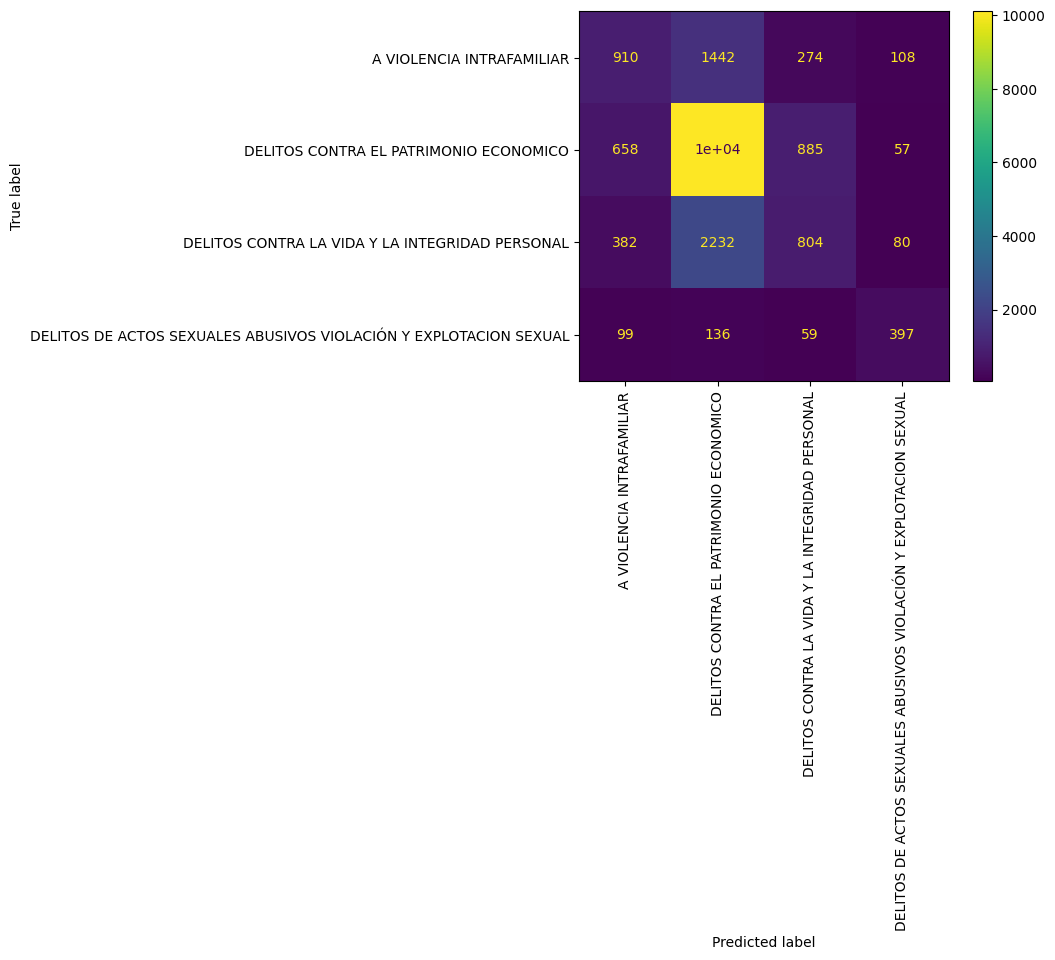

In [43]:
#matrix de confusión para analizar los errores de predicción
matrix=confusion_matrix(y_test,y_predict,labels=modeloBA.classes_)
displaymatrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=modeloBA.classes_)
displaymatrix.plot(xticks_rotation='vertical')

In [44]:
#confusion_matrix con los datos de prueba
y_predict=modeloBA.predict(X_test)
print(y_test.head(20))
print(pd.DataFrame(y_predict).head(20))

35623               DELITOS CONTRA EL PATRIMONIO ECONOMICO
69549      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
58212               DELITOS CONTRA EL PATRIMONIO ECONOMICO
25267               DELITOS CONTRA EL PATRIMONIO ECONOMICO
41003               DELITOS CONTRA EL PATRIMONIO ECONOMICO
4921                DELITOS CONTRA EL PATRIMONIO ECONOMICO
54471                            A VIOLENCIA INTRAFAMILIAR
59943                            A VIOLENCIA INTRAFAMILIAR
50915                            A VIOLENCIA INTRAFAMILIAR
88865                            A VIOLENCIA INTRAFAMILIAR
88542               DELITOS CONTRA EL PATRIMONIO ECONOMICO
31218               DELITOS CONTRA EL PATRIMONIO ECONOMICO
21088               DELITOS CONTRA EL PATRIMONIO ECONOMICO
83715      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
92870    DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y...
37885               DELITOS CONTRA EL PATRIMONIO ECONOMICO
39436               DELITOS CONTRA EL PATRIMONIO ECONOMI

In [45]:
print(classification_report(y_test,y_predict))

                                                                   precision    recall  f1-score   support

                                        A VIOLENCIA INTRAFAMILIAR       0.44      0.33      0.38      2734
                           DELITOS CONTRA EL PATRIMONIO ECONOMICO       0.73      0.86      0.79     11699
                  DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL       0.40      0.23      0.29      3498
DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL       0.62      0.57      0.60       691

                                                         accuracy                           0.66     18622
                                                        macro avg       0.55      0.50      0.51     18622
                                                     weighted avg       0.62      0.66      0.63     18622



In [46]:
jb.dump(modeloBA,"/content/drive/MyDrive/Delitos proyecto/modeloBA.bin",compress=True)

['/content/drive/MyDrive/Delitos proyecto/modeloBA.bin']

#EL MODELO DEFINITIVO modeloBA:

se escogio el modelo el modeloBA debido a que su accuracy nos dio mayor exactitud a comparacion de otros modelo sus resultados fueron mayores.

Otros motivos son porque en general es bueno para predecir cosas con precisión, incluso cuando tenemos muchos datos para mirar. Además, es bueno para tratar con datos desequilibrados y no exagerar las predicciones.
